In [ ]:
%run ../settings.py
POST_SETTINGS = {
        "image": "img/cross-entropy.jpg",
        "title": "Measuring Differences in Knowledge",
        "description": "Introduction to Cross-Entropy and KL-Divergence",
        "tags": ["Information Theory", "Articles", "Tutorials"]
    }

# Cross Entropy intuition from a single bit

Suppose you made it to the final round of this seasons MasterChef,\
and you're serving your good friend Alice and your mortal enemy Bob an interesting challange...<br> 

They write down all the foods they're allergic to on a little pieces of paper and put them in a bag, along with the other audience members <br>
We now have a bag of words containing the following sets:

$A = \{ peanuts, shrimp, potato \} $

$B = \{ peanuts, kale, chicken \} $

$({A\cup B})^\complement = \{ salmon, apple, toast \} $

The show host tells you to draw 3 random words $\vec{z} = \set{ z_1, z_2,z_3}$ from the bag to make tonights banquet. \
Since Bob is planning to resurrect Hitler using misaligned AGI, we're interested in finding out which of the 3 ingredients are more likely to kill Bob.

</br>

The simple way we can do this is to measure the probability $p$ that $\vec{z}$ came from the set $B$ using a random variable $X \sim Ber(p)$, \
where $P(X = x) $ is the probability that $\vec{z}$ came from the set $B$.
Since there are 8 unique foods in the bag, there's $8\choose{3}$ = $\frac{8!}{3!(8-3)!} = 56$ possible  ways of choosing $\vec{z}$,  \
but only one way to choose exactly the 3 foods in $B$, making $p(x) = \frac{1}{56}$ 


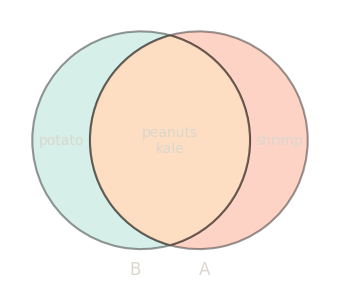

In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

A = {0, 1, 2}
B = {0, 2, 4}

intersection = B & A      # {1, 2}
only_x = B - A            # {3}
only_y = A - B            # {0}

labels = ["peanuts", "shrimp", "kale", "potato", "chicken", "salmon", "apple", "toast"]


elements = sorted(B | A)  # sorted for consistent mapping; gives [0, 1, 2, 3]
label_mapping = {num: label for num, label in zip(elements, labels)}

fig, ax = plt.subplots(figsize=(3.5, 3.5))
fig.patch.set_facecolor('none')  # Set the figure background to transparent

venn = venn2([B, A], ('B', 'A'), ax=ax)
if venn.get_label_by_id('10'):
    venn.get_label_by_id('10').set_text("\n".join(label_mapping[n] for n in only_x))
if venn.get_label_by_id('01'):
    venn.get_label_by_id('01').set_text("\n".join(label_mapping[n] for n in only_y))
if venn.get_label_by_id('11'):
    venn.get_label_by_id('11').set_text("\n".join(label_mapping[n] for n in intersection))
venn.get_patch_by_id('10').set_color('#99d8c9')   
venn.get_patch_by_id('01').set_color('#fc9272')   
venn.get_patch_by_id('11').set_color('#fdae6b')   

for patch in ['10', '01', '11']:
    if venn.get_patch_by_id(patch) is not None:
        venn.get_patch_by_id(patch).set_edgecolor('black')
        venn.get_patch_by_id(patch).set_linewidth(1.5)

plt.tight_layout()
plt.show()

However, there's significant overlap in the foods both Bob and Alice are allergic to, and Alice is currently training a machine learning model that cures cancer, \
so we need a better way of analyzing which of the ingridients will avert certain doom.


Let's add another random variable $Y \sim Ber(q)$, where $Q(Y = y) $ is a measure of whether $\vec{z}$ is in $A$ \
similarly, $q(y)$ = $\frac{1}{56}$


# Cross Entropy
cross-entropy tells us how surprised we would be if z came from X, if we assumed it came from Y, <br>
in other words: if we need one bit of information to encode z being in Y, then whats the probability that it came from X? 

>$H(p,q) = {p(z) \log q(z)}$ 

